In [139]:
import numpy as np
import methods as m
import matplotlib.pyplot as plt
%matplotlib widget
%load_ext autoreload
%autoreload 2



hvOBJ = m.hvobj(3)
perf = m.performance_metrics.get_indicator("rad-simplex", radius=0.1)
perfDmin = m.performance_metrics.get_indicator("dmin")
perfVGM = m.performance_metrics.get_indicator("vgm")

sd = np.random.randint(0, 10000)
print(sd)
sd = sd
np.random.seed(sd)

names = ['Uniform', 'Energy', 'MM-S-E', 'MM-S-G', 'MM-∆', 'Seq-MM-S-G', 'Reduction', 'Construction']
colors = ['red', 'blue', 'green', 'orange', 'purple', 'aqua', 'gray', 'teal']
hv = []
points = []
SphereVolume = []
SphereOverlap = []
SphereOverflow = []
Dmin = []
VGM = []

X = []
maxx = 51

for _ in range(len(names)):
    hv.append([0.0] * (maxx//5))
    SphereVolume.append([0.0] * (maxx//5))
    SphereOverlap.append([0.0] * (maxx//5))
    SphereOverflow.append([0.0] * (maxx//5))
    Dmin.append([0.0] * (maxx//5))
    VGM.append([0.0] * (maxx//5))
    points.append([[]] * (maxx // 5))

for num in range(5, maxx, 5):
    X.append(num)
    points[0][num // 5 - 1] = m.dich(num)
    points[1][num // 5 - 1] = m.getRD(3, num,seed=sd)
    points[2][num // 5 - 1] = m.maximinSphere(num, 100, m.eluc_dis, m.randomSpherePoint)
    points[3][num // 5 - 1] = m.maximinSphere(num, 100, m.circle_dis, m.randomSpherePoint)
    points[4][num // 5 - 1] = m.maximin(num, 1000, m.eluc_dis, m.random2SimplexPoint)
    points[5][num // 5 - 1] = m.SeqmaximinSphere(num, 100, m.circle_dis, m.randomSpherePoint, past=m.maximin(num, 50, m.circle_dis, m.randomSpherePoint))
    points[6][num // 5 - 1] = m.getRED(3, num, seed=sd)
    points[7][num // 5 - 1] = m.getCons(3, num, seed=sd)
    
    for i in range(len(names)):
        hv[i][num // 5 - 1] = m.calchv(hvOBJ, np.array(points[i][num // 5 - 1]))
        metrics = perf.do(np.array(points[i][num // 5 - 1]))
        SphereVolume[i][num // 5 - 1] = metrics[0]
        SphereOverlap[i][num // 5 - 1] = metrics[1]
        SphereOverflow[i][num // 5 - 1] = metrics[2]
        Dmin[i][num // 5 - 1] = perfDmin.do(np.array(points[i][num // 5 - 1]))
        VGM[i][num // 5 - 1] = perfVGM.do(np.array(points[i][num // 5 - 1])) * 100
        

titles = ["Hypervolume", "Sphere Volume","Sphere Overlap", "Sphere Overflow", "D-Min", "VGM"]




# a7 = m.getmap3D()

# a8 = m.getmap2D()
# N = 16

# p7 = np.array(np.arange(2 * N).reshape(N,2),dtype=float)

# low = int(N ** (1/2))

# for i in range(low):
#     for j in range(low):
#         p7[i * low + j][0] = (i / (low-1))
#         p7[i * low + j][1] = (j / (low-1))
# a8.plot(p7[:,0], p7[:,1],'ok')
# p7  = m.map_hypercuble_to_simplex(p7)
# a7.plot(p7[:,0], p7[:,1], p7[:,2],'ok')
# print(p7)




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
6393


ValueError: x and y must have same first dimension, but have shapes (10,) and (500,)

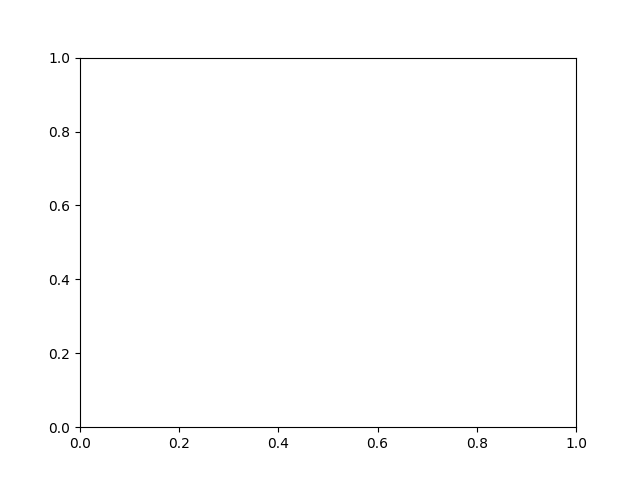

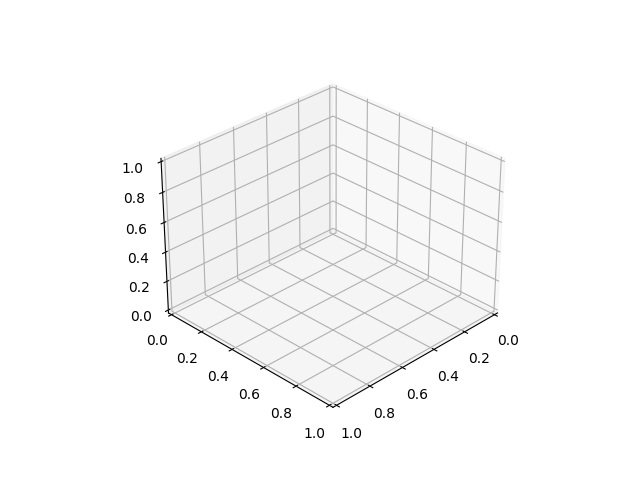

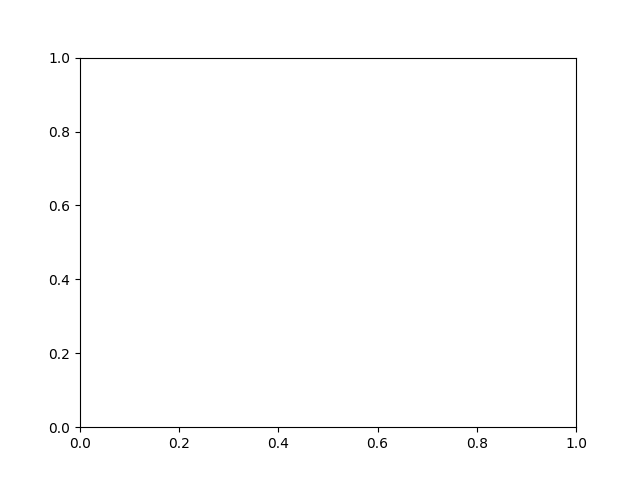

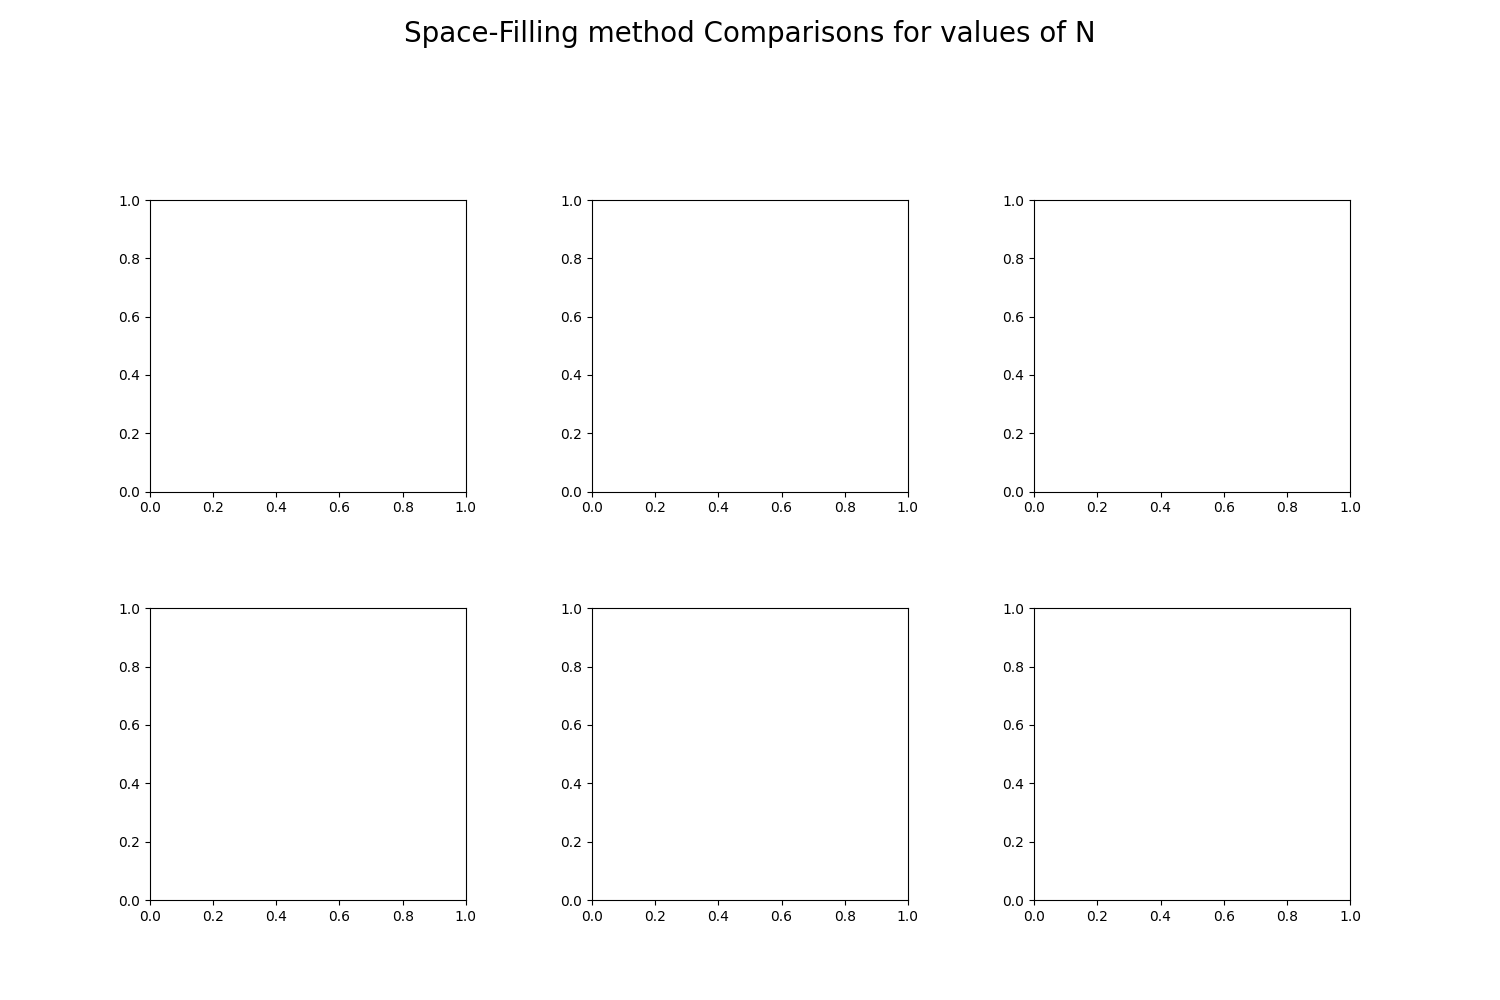

In [150]:
from scipy.interpolate import make_interp_spline

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(15,10))
fig.suptitle("Space-Filling method Comparisons for values of N", fontsize=20)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    top=0.8,
                    right=0.9, 
                    wspace=0.4, 
                    hspace=0.4)


axHV = ax[0][0]
axVol = ax[0][1]
axOver = ax[0][2]
axFlow = ax[1][0]
axDmin = ax[1][1]
axVGM = ax[1][2]

hvmax = np.argmax(np.array(hv)[:,-1])
volmax = np.argmax(np.array(SphereVolume)[:,-1])
overmax = np.argmin(np.array(SphereOverlap)[:,-1])
flowmax = np.argmin(np.array(SphereOverflow)[:,-1])
dminmax = np.argmax(np.array(Dmin)[:,-1])
vgmmax = np.argmin(np.array(VGM)[:,-1])

for i in range(len(names)):
    # axHV.plot(X,hv[i], colors[i], label=names[i]+'>'+str(round(hv[i][-1], 2)))
    # axVol.plot(X,SphereVolume[i], colors[i], label=names[i]+'>'+str(round(SphereVolume[i][-1], 2)))
    # axOver.plot(X,SphereOverlap[i], colors[i], label=names[i]+'>'+str(round(SphereOverlap[i][-1], 2)))
    # axFlow.plot(X,SphereOverflow[i], colors[i], label=names[i]+'>'+str(round(SphereOverflow[i][-1], 2)))
    # axDmin.plot(X,Dmin[i], colors[i], label=names[i]+'>'+str(round(Dmin[i][-1], 2)))
    # axVGM.plot(X,VGM[i], colors[i], label=names[i]+'>'+str(round(VGM[i][-1], 2)))
    hvX, hvY = m.spline(X, hv[i])
    sVX, sVY = m.spline(X, SphereVolume[i])
    sOX, sOY = m.spline(X, SphereOverlap[i])
    sFX, sFY = m.spline(X, SphereOverflow[i])
    dMX, dMY = m.spline(X, Dmin[i])
    VGX, VGY = m.spline(X, VGM[i])

    m.plotLine(axHV,hvX, hvY, colors[i], names[i], titles[0], (hvmax==i))
    m.plotLine(axVol, sVX,sVY, colors[i], names[i], titles[1], (volmax==i))
    m.plotLine(axOver, sOX, sOY, colors[i], names[i], titles[2], (overmax==i))
    m.plotLine(axFlow, sFX, sFY,colors[i], names[i], titles[3], (flowmax==i))
    m.plotLine(axDmin, dMX, dMY, colors[i], names[i], titles[4], (dminmax==i))
    m.plotLine(axVGM, VGX, VGY, colors[i], names[i], titles[5], (vgmmax==i))

handles, labels = ax[0][0].get_legend_handles_labels()
fig.legend(handles, labels, frameon=True, loc='upper center',ncol=8,handlelength=4, bbox_to_anchor=(0.5, 0.9))